In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import glob
import os
import shutil
import random

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [4]:
tf.test.is_gpu_available

<function tensorflow.python.framework.test_util.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)>

In [5]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Import and preprocess data

In [3]:
train_path = 'G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset_Oversampled/train'
test_path = 'G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset_Oversampled/test'
validation_path = 'G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset_Oversampled/validation'
train_csv_path = 'G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/train.csv'
test_csv_path = 'G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/test.csv'

In [6]:
os.chdir('G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset')

# for c in random.sample(glob.glob('G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/train/angry/*.jpg'),400):
#     shutil.move(c, 'G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/validation/angry')
# for c in random.sample(glob.glob('G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/test/angry/*.jpg'),320):
#     shutil.move(c, 'G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/validation/angry')
    
# for c in random.sample(glob.glob('G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/train/sad/*.jpg'),400):
#     shutil.move(c, 'G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/validation/sad')
# for c in random.sample(glob.glob('G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/test/sad/*.jpg'),320):
#     shutil.move(c, 'G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/validation/sad')

# for c in random.sample(glob.glob('G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/train/happy/*.jpg'),400):
#     shutil.move(c, 'G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/validation/happy')
# for c in random.sample(glob.glob('G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/test/happy/*.jpg'),320):
#     shutil.move(c, 'G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/validation/happy')
    
# for c in random.sample(glob.glob('G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/train/disgust/*.jpg'),400):
#     shutil.move(c, 'G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/validation/disgust')
# # for c in random.sample(glob.glob('G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/test/disgust/*.jpg'),320):
# #     shutil.move(c, 'G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/validation/disgust')

# for c in random.sample(glob.glob('G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/train/surprise/*.jpg'),400):
#     shutil.move(c, 'G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/validation/surprise')
# for c in random.sample(glob.glob('G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/test/surprise/*.jpg'),320):
#     shutil.move(c, 'G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/validation/surprise')

# for c in random.sample(glob.glob('G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/train/fear/*.jpg'),400):
#     shutil.move(c, 'G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/validation/fear')
# for c in random.sample(glob.glob('G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/test/fear/*.jpg'),320):
#     shutil.move(c, 'G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/validation/fear')
    
# for c in random.sample(glob.glob('G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/train/neutral/*.jpg'),400):
#     shutil.move(c, 'G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/validation/neutral')
# for c in random.sample(glob.glob('G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/test/neutral/*.jpg'),320):
#     shutil.move(c, 'G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset/validation/neutral')

In [8]:
emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]  # indices 0 to 6

In [9]:
dataset = pd.read_csv(train_csv_path)

In [10]:
dataset

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705,0,114 112 113 113 111 111 112 113 115 113 114 11...
28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...


In [66]:
print(dataset["emotion"].value_counts(sort=False).sum()) #don't sort by frequenies

28709


In [67]:
FER2013_WIDTH, FER2013_HEIGHT = 48,48
def fer2013_show_image(index):
    """Shows the image and the emotion label of the index's instance."""
    image = np.reshape(dataset.at[index, "pixels"].split(" "), (FER2013_WIDTH, FER2013_HEIGHT)).astype("float")
    image -= np.mean(image)
    image /= np.std(image)
    print(emotions[dataset.at[index, "emotion"]])
    plt.imshow(image, cmap="gray")

Sad


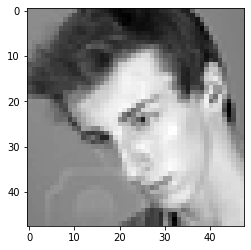

In [68]:
fer2013_show_image(np.random.randint(0,len(dataset)))

In [4]:
train_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)
train = train_datagen.flow_from_directory(train_path, target_size = (227,227), class_mode='categorical', shuffle=True )

Found 32678 images belonging to 7 classes.


In [8]:
train.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

* 'angry': 0   => 4315
* 'disgust': 1 => 436 ====> 3488
* 'fear': 2    => 4417 ====> 4967
* 'happy': 3   => 7535 ====> 5376
* 'neutral': 4 => 5285
* 'sad': 5     => 5150
* 'surprise': 6 => 3491 ====> 4097

In [5]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_batches = test_datagen.flow_from_directory(test_path, target_size = (227,227), class_mode='categorical',
                                                batch_size=10, shuffle=False)

Found 5258 images belonging to 7 classes.


In [6]:
# val_datagen = ImageDataGenerator(rescale=1. / 255)
# validation_set = val_datagen.flow_from_directory(validation_path, target_size = (227,227), class_mode='categorical' )

In [9]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 227, 227, 3)
Batch Size for Output Image :  (32, 7)
Image Size of first image :  (227, 227, 3)
Output of first image :  (7,)


In [76]:
train[0][0][0][0].shape # this is one row of pixels in one image

(227, 3)

In [26]:
def fer2013_to_X():
    """Transforms the (blank separated) pixel strings in the DataFrame to an 3-dimensional array 
    (1st dim: instances, 2nd and 3rd dims represent 2D image)."""
    
    X = []
    pixels_list = dataset["pixels"].values
    
    for pixels in pixels_list:
        single_image = np.reshape(pixels.split(" "), (FER2013_WIDTH, FER2013_HEIGHT)).astype("float")
        X.append(single_image)
        
    # Convert list to 4D array:
    X = np.expand_dims(np.array(X), -1)
    
    # Normalize image data:
    X -= np.mean(X, axis=0)
    X /= np.std(X, axis=0)
    
    return X

In [27]:
# # Get features (image data)
# X = fer2013_to_X()
# X.shape

In [28]:
# # Get labels (one-hot encoded)
# y = pd.get_dummies(dataset['emotion']).values
# y.shape

In [29]:
# Save data
# np.save("fer2013_X", X)
# np.save("fer2013_y", y)

In [30]:
# from tf.keras.preprocessing.image import ImageDataGenerator

# train_batches = ImageDataGenerator().from(X) 

In [31]:
# print(y)

## Make model

### Model

In [15]:
from keras.layers import Conv2D, MaxPooling2D, Activation, BatchNormalization, Flatten, Dense, Dropout

model = keras.models.Sequential()
  
# 1st Convolutional Layer
model.add(Conv2D(filters = 96, input_shape = (227, 227, 3), 
            kernel_size = (11, 11), strides = (4, 4), 
            padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling 
model.add(MaxPooling2D(pool_size = (2, 2),
            strides = (2, 2), padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
  
# 2nd Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (11, 11), 
            strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), 
            padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
  
# 3rd Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3), 
            strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
  
# 4th Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3), 
            strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
  
# 5th Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (3, 3), 
            strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), 
            padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
  
# Flattening
model.add(Flatten())
  
# 1st Dense Layer
model.add(Dense(4096, input_shape = (227*227*3, )))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())
  
# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())
  
# Output Softmax Layer
model.add(Dense(7))
model.add(Activation('softmax'))

In [16]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 27, 27, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 17, 17, 256)      

## Train model

### https://blog.paperspace.com/improving-model-accuracy/

In [121]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("alexnetModel3.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1, min_delta=0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]
# callbacks_list = [checkpoint, reduce_learningrate]



In [122]:
history = model.fit(train, epochs=12, verbose=1)

Epoch 1/12
1004/1004 [==============================] - 64s 63ms/step - loss: 2.3404 - accuracy: 0.2489
Epoch 2/12
1004/1004 [==============================] - 55s 54ms/step - loss: 1.8572 - accuracy: 0.3748
Epoch 3/12
1004/1004 [==============================] - 55s 55ms/step - loss: 1.5550 - accuracy: 0.4526
Epoch 4/12
1004/1004 [==============================] - 55s 55ms/step - loss: 1.3444 - accuracy: 0.5111
Epoch 5/12
1004/1004 [==============================] - 55s 55ms/step - loss: 1.1915 - accuracy: 0.5608
Epoch 6/12
1004/1004 [==============================] - 56s 55ms/step - loss: 1.0681 - accuracy: 0.5999
Epoch 7/12
1004/1004 [==============================] - 57s 56ms/step - loss: 0.9898 - accuracy: 0.6275
Epoch 8/12
1004/1004 [==============================] - 57s 57ms/step - loss: 0.9112 - accuracy: 0.6576
Epoch 9/12
1004/1004 [==============================] - 57s 57ms/step - loss: 0.8246 - accuracy: 0.6886
Epoch 10/12
1004/1004 [==============================] - 59s 58m

In [45]:
# filename = "Completed_model.joblib"
# joblib.dump(model, filename)

We can save our model just by calling model.save function and passing in the filepath as the argument. 
This will save the model’s:
* Model Architecture
* Model Weights
* Model optimizer state (so that you can continue the training from where you left)

In [35]:
# model.save('AlexnetModel3new_validationSet.h5')

### Load Model

In [17]:
# model.load_weights('myModel.h5')
model.load_weights('AlexnetModel3new_validationSet.h5')

## Predict

In [26]:
def plotImages(images_arr):
  fig, axes = plt.subplots(2,5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

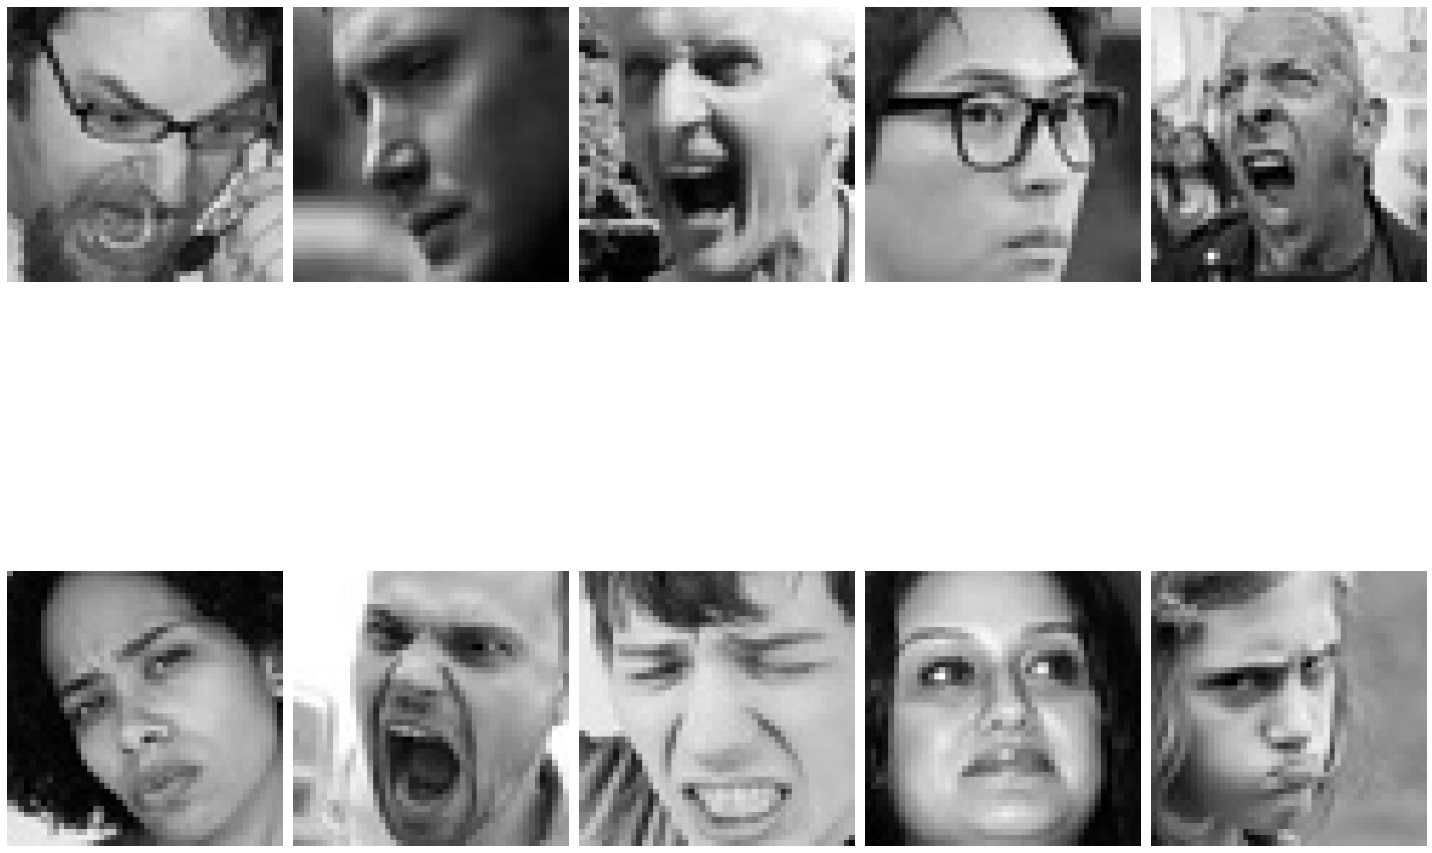

[[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


In [38]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)


In [15]:
import sys
np.set_printoptions(threshold=sys.maxsize)
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [17]:
predictions = model.predict(test_batches, verbose=1)

526/526 [==============================] - 19s 20ms/step


In [18]:
print(predictions.shape)
np.round(predictions) 

(5258, 7)


array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
 

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=1))

In [20]:
import itertools

def plot_confusion_matrix(cm, classes, 
                          normalize= False, 
                          title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, Without Normalization")
        
    print(cm)
    
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j],
            horizontalalignment = "center",
            color = "white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label') 
    

In [21]:
test_batches.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

Confusion Matrix, Without Normalization
[[ 356    0   90   26   57   97   12]
 [  55    0   25    4    9   17    1]
 [  80    0  310   27   78  149   60]
 [  43    0   42 1176  112   55   26]
 [  72    0   67   58  553  155    8]
 [ 103    0  122   48  134  508   12]
 [  10    0   71   27   12   16  375]]

               precision    recall  f1-score   support

           0       0.50      0.56      0.52       638
           1       0.00      0.00      0.00       111
           2       0.43      0.44      0.43       704
           3       0.86      0.81      0.83      1454
           4       0.58      0.61      0.59       913
           5       0.51      0.55      0.53       927
           6       0.76      0.73      0.75       511

    accuracy                           0.62      5258
   macro avg       0.52      0.53      0.52      5258
weighted avg       0.62      0.62      0.62      5258



c:\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


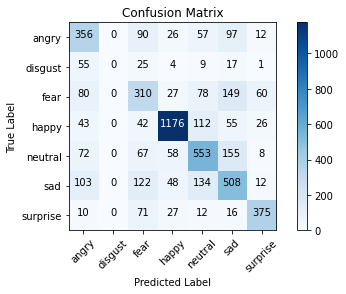

In [22]:
cm_plot_labels = ['angry', 'disgust','fear','happy','neutral','sad','surprise']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)

from sklearn.metrics import classification_report
print("\n",classification_report(test_batches.classes, y_pred=np.argmax(predictions, axis=1)))

In [23]:
accuracy_score(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=1))

0.6234309623430963

## ACCURACY SCORE : 0.6163276678740597

## ACCURACY SCORE : 0.6249524534043363 (with callbacks (minDelta = 0.0001) and 2 epochs)

## ACCURACY SCORE : 0.6298972993533662 (with callbacks (minDelta = 0.0001) and 20 epochs)
<pre>
Epoch 1/20
810/810 [==============================] - ETA: 0s - loss: 0.4405 - accuracy: 0.8350
Epoch 00001: val_accuracy did not improve from 0.57225
810/810 [==============================] - 48s 59ms/step - loss: 0.4405 - accuracy: 0.8350 - val_loss: 1.3800 - val_accuracy: 0.5691 - lr: 2.0000e-05
Epoch 2/20
810/810 [==============================] - ETA: 0s - loss: 0.3716 - accuracy: 0.8615
Epoch 00002: val_accuracy improved from 0.57225 to 0.57606, saving model to alexnetModel2.h5
810/810 [==============================] - 58s 71ms/step - loss: 0.3716 - accuracy: 0.8615 - val_loss: 1.4735 - val_accuracy: 0.5761 - lr: 2.0000e-05
Epoch 3/20
810/810 [==============================] - ETA: 0s - loss: 0.3099 - accuracy: 0.8857
Epoch 00003: val_accuracy did not improve from 0.57606
810/810 [==============================] - 57s 71ms/step - loss: 0.3099 - accuracy: 0.8857 - val_loss: 1.5667 - val_accuracy: 0.5706 - lr: 2.0000e-05
Epoch 4/20
810/810 [==============================] - ETA: 0s - loss: 0.2576 - accuracy: 0.9092Restoring model weights from the end of the best epoch: 1.

Epoch 00004: val_accuracy did not improve from 0.57606

Epoch 00004: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.
810/810 [==============================] - 71s 88ms/step - loss: 0.2576 - accuracy: 0.9092 - val_loss: 1.7686 - val_accuracy: 0.5553 - lr: 2.0000e-05
Epoch 00004: early stopping
</pre>

## ACCURACY SCORE : 0.6300874857360212 (with callbacks (minDelta = 0.01) and 20 epochs)
<pre>
Epoch 1/20
810/810 [==============================] - ETA: 0s - loss: 0.3503 - accuracy: 0.8736
Epoch 00001: val_accuracy improved from -inf to 0.57479, saving model to alexnetModel2.h5
810/810 [==============================] - 85s 105ms/step - loss: 0.3503 - accuracy: 0.8736 - val_loss: 1.4298 - val_accuracy: 0.5748 - lr: 4.0000e-06
Epoch 2/20
810/810 [==============================] - ETA: 0s - loss: 0.3288 - accuracy: 0.8792
Epoch 00002: val_accuracy improved from 0.57479 to 0.57648, saving model to alexnetModel2.h5
810/810 [==============================] - 56s 69ms/step - loss: 0.3288 - accuracy: 0.8792 - val_loss: 1.4773 - val_accuracy: 0.5765 - lr: 4.0000e-06
Epoch 3/20
810/810 [==============================] - ETA: 0s - loss: 0.3077 - accuracy: 0.8858
Epoch 00003: val_accuracy did not improve from 0.57648
810/810 [==============================] - 54s 66ms/step - loss: 0.3077 - accuracy: 0.8858 - val_loss: 1.5184 - val_accuracy: 0.5731 - lr: 4.0000e-06
Epoch 4/20
810/810 [==============================] - ETA: 0s - loss: 0.2892 - accuracy: 0.8944Restoring model weights from the end of the best epoch: 1.

Epoch 00004: val_accuracy did not improve from 0.57648

Epoch 00004: ReduceLROnPlateau reducing learning rate to 7.999999979801942e-07.
810/810 [==============================] - 58s 71ms/step - loss: 0.2892 - accuracy: 0.8944 - val_loss: 1.5593 - val_accuracy: 0.5744 - lr: 4.0000e-06
Epoch 00004: early stopping
</pre>

### Model 2 predictions

## ACCURACY SCORE : 0.5300494484594903 (with call backs)

<pre>
Epoch 1/20
810/810 [==============================] - ETA: 0s - loss: 2.3063 - accuracy: 0.2510
Epoch 00001: val_accuracy improved from -inf to 0.25275, saving model to alexnetModel2.h5
810/810 [==============================] - 891s 1s/step - loss: 2.3063 - accuracy: 0.2510 - val_loss: 2.1179 - val_accuracy: 0.2528 - lr: 1.0000e-04
Epoch 2/20
809/810 [============================>.] - ETA: 0s - loss: 1.8462 - accuracy: 0.3424
Epoch 00002: val_accuracy did not improve from 0.25275

Epoch 00002: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
810/810 [==============================] - 36s 45ms/step - loss: 1.8467 - accuracy: 0.3422 - val_loss: 2.9541 - val_accuracy: 0.1930 - lr: 1.0000e-04
Epoch 3/20
809/810 [============================>.] - ETA: 0s - loss: 1.5486 - accuracy: 0.4336
Epoch 00003: val_accuracy improved from 0.25275 to 0.41843, saving model to alexnetModel2.h5
810/810 [==============================] - 38s 47ms/step - loss: 1.5484 - accuracy: 0.4337 - val_loss: 1.7678 - val_accuracy: 0.4184 - lr: 2.0000e-05
Epoch 4/20
809/810 [============================>.] - ETA: 0s - loss: 1.4497 - accuracy: 0.4735
Epoch 00004: val_accuracy improved from 0.41843 to 0.44470, saving model to alexnetModel2.h5
810/810 [==============================] - 39s 48ms/step - loss: 1.4492 - accuracy: 0.4736 - val_loss: 1.7491 - val_accuracy: 0.4447 - lr: 2.0000e-05
Epoch 5/20
809/810 [============================>.] - ETA: 0s - loss: 1.3543 - accuracy: 0.5120
Epoch 00005: val_accuracy did not improve from 0.44470

Epoch 00005: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.
810/810 [==============================] - 37s 46ms/step - loss: 1.3538 - accuracy: 0.5121 - val_loss: 2.1014 - val_accuracy: 0.3892 - lr: 2.0000e-05
Epoch 6/20
809/810 [============================>.] - ETA: 0s - loss: 1.1715 - accuracy: 0.5711
Epoch 00006: val_accuracy improved from 0.44470 to 0.47352, saving model to alexnetModel2.h5
810/810 [==============================] - 39s 48ms/step - loss: 1.1716 - accuracy: 0.5710 - val_loss: 1.6423 - val_accuracy: 0.4735 - lr: 4.0000e-06
Epoch 7/20
810/810 [==============================] - ETA: 0s - loss: 1.1069 - accuracy: 0.5953
Epoch 00007: val_accuracy improved from 0.47352 to 0.47500, saving model to alexnetModel2.h5

Epoch 00007: ReduceLROnPlateau reducing learning rate to 7.999999979801942e-07.
810/810 [==============================] - 39s 48ms/step - loss: 1.1069 - accuracy: 0.5953 - val_loss: 1.7077 - val_accuracy: 0.4750 - lr: 4.0000e-06
Epoch 8/20
809/810 [============================>.] - ETA: 0s - loss: 1.0410 - accuracy: 0.6217
Epoch 00008: val_accuracy improved from 0.47500 to 0.48114, saving model to alexnetModel2.h5

Epoch 00008: ReduceLROnPlateau reducing learning rate to 1.600000018697756e-07.
810/810 [==============================] - 39s 48ms/step - loss: 1.0411 - accuracy: 0.6217 - val_loss: 1.6753 - val_accuracy: 0.4811 - lr: 8.0000e-07
Epoch 9/20
810/810 [==============================] - ETA: 0s - loss: 1.0195 - accuracy: 0.6324Restoring model weights from the end of the best epoch: 6.

Epoch 00009: val_accuracy improved from 0.48114 to 0.48305, saving model to alexnetModel2.h5

Epoch 00009: ReduceLROnPlateau reducing learning rate to 3.199999980552093e-08.
810/810 [==============================] - 39s 48ms/step - loss: 1.0195 - accuracy: 0.6324 - val_loss: 1.6767 - val_accuracy: 0.4831 - lr: 1.6000e-07
Epoch 00009: early stopping
</pre>

## ACCURACY SCORE : 0.5346139216432103 (no early stopping, ReduceLROnPlat.patience=3)

<pre>
Epoch 1/20
810/810 [==============================] - ETA: 0s - loss: 1.1056 - accuracy: 0.5960
Epoch 00001: val_accuracy improved from -inf to 0.47648, saving model to alexnetModel2.h5
810/810 [==============================] - 39s 47ms/step - loss: 1.1056 - accuracy: 0.5960 - val_loss: 1.6608 - val_accuracy: 0.4765 - lr: 3.2000e-08
Epoch 2/20
810/810 [==============================] - ETA: 0s - loss: 1.1075 - accuracy: 0.5990
Epoch 00002: val_accuracy improved from 0.47648 to 0.47669, saving model to alexnetModel2.h5
810/810 [==============================] - 39s 48ms/step - loss: 1.1075 - accuracy: 0.5990 - val_loss: 1.6566 - val_accuracy: 0.4767 - lr: 3.2000e-08
Epoch 3/20
809/810 [============================>.] - ETA: 0s - loss: 1.1004 - accuracy: 0.5950
Epoch 00003: val_accuracy improved from 0.47669 to 0.47839, saving model to alexnetModel2.h5
810/810 [==============================] - 39s 49ms/step - loss: 1.1002 - accuracy: 0.5950 - val_loss: 1.6600 - val_accuracy: 0.4784 - lr: 3.2000e-08
Epoch 4/20
810/810 [==============================] - ETA: 0s - loss: 1.1033 - accuracy: 0.5969
Epoch 00004: val_accuracy did not improve from 0.47839
810/810 [==============================] - 37s 46ms/step - loss: 1.1033 - accuracy: 0.5969 - val_loss: 1.6562 - val_accuracy: 0.4769 - lr: 3.2000e-08
Epoch 5/20
809/810 [============================>.] - ETA: 0s - loss: 1.0968 - accuracy: 0.5978
Epoch 00005: val_accuracy did not improve from 0.47839
810/810 [==============================] - 37s 46ms/step - loss: 1.0969 - accuracy: 0.5978 - val_loss: 1.6606 - val_accuracy: 0.4773 - lr: 3.2000e-08
Epoch 6/20
809/810 [============================>.] - ETA: 0s - loss: 1.0978 - accuracy: 0.5976
Epoch 00006: val_accuracy did not improve from 0.47839

Epoch 00006: ReduceLROnPlateau reducing learning rate to 6.399999818995639e-09.
810/810 [==============================] - 37s 46ms/step - loss: 1.0977 - accuracy: 0.5977 - val_loss: 1.6565 - val_accuracy: 0.4771 - lr: 3.2000e-08
Epoch 7/20
810/810 [==============================] - ETA: 0s - loss: 1.1042 - accuracy: 0.5966
Epoch 00007: val_accuracy did not improve from 0.47839
810/810 [==============================] - 38s 47ms/step - loss: 1.1042 - accuracy: 0.5966 - val_loss: 1.6556 - val_accuracy: 0.4784 - lr: 6.4000e-09
Epoch 8/20
809/810 [============================>.] - ETA: 0s - loss: 1.0985 - accuracy: 0.5969
Epoch 00008: val_accuracy did not improve from 0.47839
810/810 [==============================] - 39s 48ms/step - loss: 1.0986 - accuracy: 0.5969 - val_loss: 1.6538 - val_accuracy: 0.4767 - lr: 6.4000e-09
Epoch 9/20
809/810 [============================>.] - ETA: 0s - loss: 1.0950 - accuracy: 0.5996
Epoch 00009: val_accuracy did not improve from 0.47839
810/810 [==============================] - 38s 46ms/step - loss: 1.0958 - accuracy: 0.5994 - val_loss: 1.6578 - val_accuracy: 0.4771 - lr: 6.4000e-09
Epoch 10/20
809/810 [============================>.] - ETA: 0s - loss: 1.0939 - accuracy: 0.5981
Epoch 00010: val_accuracy did not improve from 0.47839

Epoch 00010: ReduceLROnPlateau reducing learning rate to 1.279999928271991e-09.
810/810 [==============================] - 38s 47ms/step - loss: 1.0940 - accuracy: 0.5982 - val_loss: 1.6573 - val_accuracy: 0.4784 - lr: 6.4000e-09
Epoch 11/20
810/810 [==============================] - ETA: 0s - loss: 1.0867 - accuracy: 0.6011Restoring model weights from the end of the best epoch: 8.

Epoch 00011: val_accuracy did not improve from 0.47839
810/810 [==============================] - 38s 47ms/step - loss: 1.0867 - accuracy: 0.6011 - val_loss: 1.6610 - val_accuracy: 0.4761 - lr: 1.2800e-09
Epoch 00011: early stopping
</pre>

(1, 227, 227)
Prediction:  [[0. 0. 0. 0. 0. 0. 1.]]
Rounded predictions:  [[0. 0. 0. 0. 0. 0. 1.]]
[6]


'surprise'

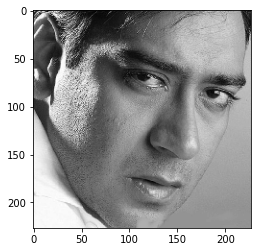

In [7]:
# test_image = 'G:\Jupyter Notebook Workspace\CLL - Project\AlexNet\PrivateTest_2260082.jpg'
test_image_path = r'G:\Jupyter Notebook Workspace\CLL - Project\Indian faces\indian\male_sad_2.jpg'

img = plt.imread(test_image_path)
# print(emotions[dataset.at[index, "emotion"]])
plt.imshow(img, cmap="gray")

from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

#load the image
my_image = load_img(test_image_path, target_size=(227, 227), color_mode='grayscale')
plt.imshow(my_image, cmap="gray")

#preprocess the image
my_image = img_to_array(my_image)
my_image = my_image.reshape((1, my_image.shape[0],  my_image.shape[1]))
print(my_image.shape)

# my_image = preprocess_input(my_image)
# print(my_image.shape)

#make the prediction!!!
prediction = model.predict(my_image)
print("Prediction: ",prediction)
print("Rounded predictions: ", np.round(prediction) )

# print("lenght of prediction array",len(prediction[0]))
def decode_prediction(prediction_nd_array):
    classes = ['angry', 'disgust','fear','happy','neutral','sad','surprise']
    index = np.argmax(prediction_nd_array, axis=1)
    print(index)
    return classes[index.item()] # item() converts matrix to a scaler

decode_prediction(prediction)

In [19]:
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

def decode_prediction(prediction_nd_array):
    classes = ['angry', 'disgust','fear','happy','neutral','sad','surprise']
    index = np.argmax(prediction_nd_array, axis=1)
#     print(index)
    return classes[index.item()] # item() converts matrix to a scaler

def predictLabelsForMyImages(image_path, prediction_array):
#     img = plt.imread(image_path)
#     plt.imshow(my_image, cmap="gray")    

    #load the image
    my_image = load_img(image_path, target_size=(227, 227), color_mode='grayscale')
    
    #preprocess the image
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0],  my_image.shape[1]))
    
    #make the prediction
    prediction = model.predict(my_image)
    # print("Prediction: ",prediction)
    print("Rounded predictions: ", np.round(prediction) )
    print(decode_prediction(prediction))
    prediction_array.append(decode_prediction(prediction))

    
def plotImages(images_arr):
    fig, axes = plt.subplots(2,5, figsize=(20,20))
    axes = axes.flatten()
    i = -1
    for img, ax in zip(images_arr, axes):
        i += 1
        image = plt.imread(img)
        ax.imshow(image, cmap="gray")
        ax.set_title(predictions_as_labels[i], fontdict={'fontsize': 26, 'fontweight': 'medium'})
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [20]:
# indian_faces = ImageDataGenerator(rescale=1. / 255)
# indian_faces_path = r'G:\Jupyter Notebook Workspace\CLL - Project\Indian faces'
# indian_faces_batches = indian_faces.flow_from_directory(indian_faces_path, target_size = (227,227),
#                                                 batch_size=20, shuffle=False)
# for c in sample(glob.glob('G:\Jupyter Notebook Workspace\CLL - Project\Indian faces/*.jpg')):

from pathlib import Path
 
# get the path/directory
folder_dir = r'G:\Jupyter Notebook Workspace\CLL - Project\Indian faces\indian'

predictions_as_labels = []

# iterate over files in
# that directory
image_array=[]
images = Path(folder_dir).glob('*.jpg')
for image in images:
    #my_image = load_img(image, target_size=(227, 227), color_mode='grayscale')
    image_array.append(str(image))
    print("\n",str(image)[64:])
    predictLabelsForMyImages(image, predictions_as_labels)

print("\n",predictions_as_labels)

plotImages(image_array)


 female_happy_1.jpg


ValueError: cannot reshape array of size 51529 into shape (1,227,227,3)